In [50]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [51]:
df= pd.read_csv('../AirPassengers.csv')
df.head()
df.drop(['Month'], axis=1, inplace=True)
dataset = np.array(df)
# dataset.reshape(-1,1)

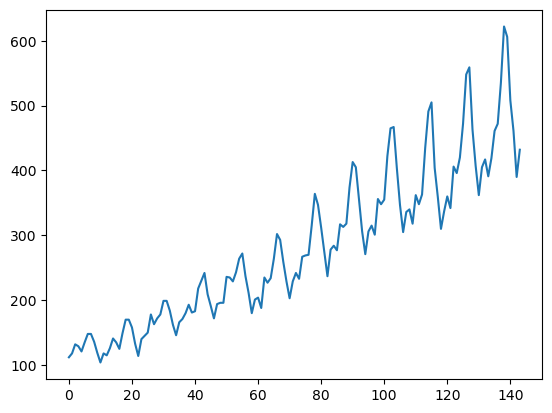

In [52]:
plt.plot(dataset)

In [53]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

In [54]:
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train= dataset[:train_size]
test = dataset[train_size:len(dataset)]

In [55]:
def get_data(data,lookback):
    X, Y = [], []
    for i in range(len(data) - lookback -1):
        X.append(data[i:i+lookback])
        Y.append(data[i+lookback])
    return np.array(X), np.array(Y).reshape(-1,1)
lookback=5
X_train, y_train = get_data(train,lookback)
X_test, y_test = get_data(test,lookback)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [56]:
X_train.shape

(109, 5, 1)

In [57]:
model=Sequential()
model.add(SimpleRNN(5,input_shape=(lookback,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer ='adam')

In [58]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_7 (SimpleRNN)    (None, 5)                 35        
                                                                 
 dense_6 (Dense)             (None, 1)                 6         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.fit(X_train,y_train, epochs=20, batch_size=1)
y_pred=model.predict(X_test)
y_test = scaler.inverse_transform(y_test)
y_pred=scaler.inverse_transform(y_pred)

Epoch 1/20


109/109 [==============================] - 3s 21ms/step - loss: 0.0129
Epoch 2/20
109/109 [==============================] - 2s 18ms/step - loss: 0.0053
Epoch 3/20
109/109 [==============================] - 2s 17ms/step - loss: 0.0040
Epoch 4/20
109/109 [==============================] - 2s 18ms/step - loss: 0.0033
Epoch 5/20
109/109 [==============================] - 2s 18ms/step - loss: 0.0027
Epoch 6/20
109/109 [==============================] - 2s 17ms/step - loss: 0.0027
Epoch 7/20
109/109 [==============================] - 2s 17ms/step - loss: 0.0025
Epoch 8/20
109/109 [==============================] - 2s 17ms/step - loss: 0.0027
Epoch 9/20
109/109 [==============================] - 2s 20ms/step - loss: 0.0025
Epoch 10/20
109/109 [==============================] - 2s 17ms/step - loss: 0.0026
Epoch 11/20
109/109 [==============================] - 2s 17ms/step - loss: 0.0024
Epoch 12/20
109/109 [==============================] - 2s 17ms/step - loss: 0.0024
Epoch 13/20
109/109 [===

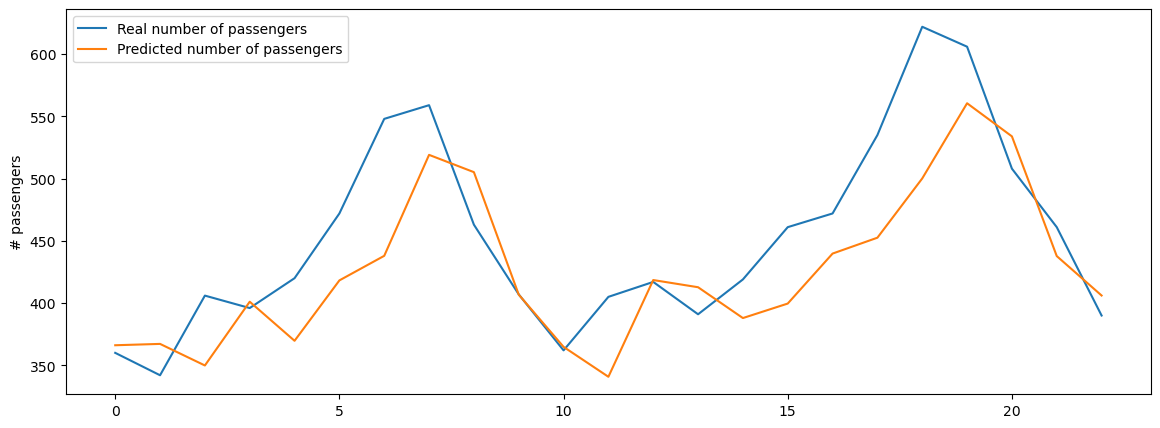

In [60]:
plt.figure(figsize=(14,5))
plt.plot(y_test,label = 'Real number of passengers')
plt.plot(y_pred,label = 'Predicted number of passengers')
plt.ylabel('# passengers')
plt.legend()
plt.show()

In [61]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

2622.517420541131